# Statistics Challenge (Optional)

Use the `orders.csv` dataset in the same directory to complete this challenge.

**Background**:

There are exactly 100 sneaker shops on a sneaker retailing website, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

**Questions**:

- What went wrong with this metric (AOV) and the current analysis in general. Support your answers with appropriate visualizations.

- Propose a new metric that better represents the behavior of the stores' customers. Why are these metrics better and what are their values?

- Using the `created_at` column as a proxy for the date and time of order creation, provide a brief analysis of the trends in the customers' purchasing behavior.

Show all of your work in this notebook.

In [95]:
import pandas as pd
df = pd.read_csv("orders.csv")

biasedAOV =  3145.128
adjustedAOV =  302.58051448247926


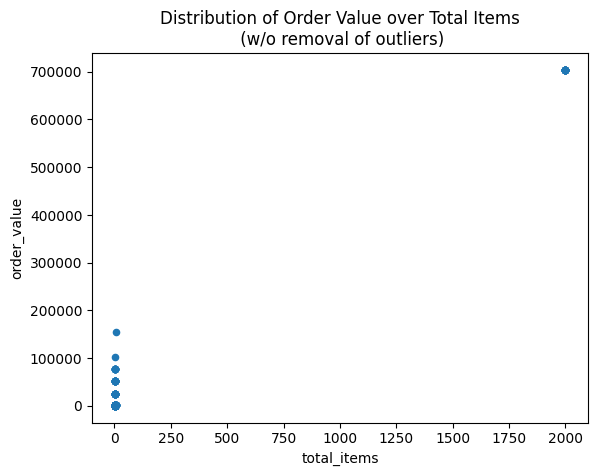

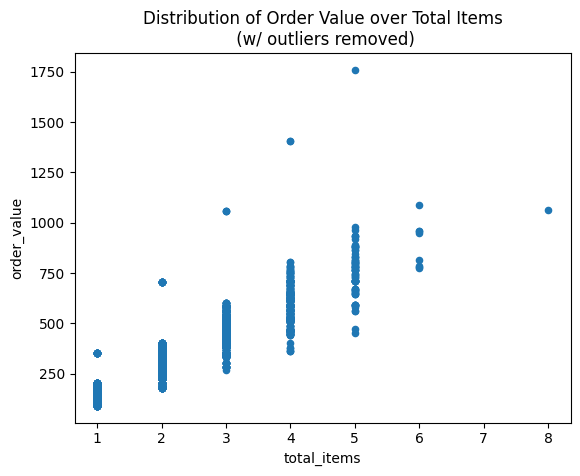

In [96]:
import numpy as np

df.plot.scatter(x="total_items", y="order_value", title="Distribution of Order Value over Total Items\n (w/o removal of outliers)")
biasedAOV = np.mean(df["order_value"])

totalItemMean = np.mean(df["total_items"])
totalItemSTDEV = np.std(df["total_items"])
for x in df["order_id"]:
    if df["total_items"][x-1] > totalItemMean + (2 * totalItemSTDEV):
        df = df.drop([x-1])

df.plot.scatter(x="total_items", y="order_value", title="Distribution of Order Value over Total Items\n (w/o removal of outliers)")

orderValueMean = np.mean(df["order_value"])
orderValueSTDEV = np.std(df["order_value"])
for x in df["order_id"]:
    if df["order_value"][x-1] > orderValueMean + (2 * orderValueSTDEV):
        df = df.drop([x-1])


df.plot.scatter(x="total_items", y="order_value", title="Distribution of Order Value over Total Items\n (w/ outliers removed)")
adjustingAOV = np.mean(df["order_value"])

print("biasedAOV = ", biasedAOV)
print("adjustedAOV = ", adjustingAOV)

Mean is not a resilient measure of center and is distorted by outliers. This means that using the mean to measure the average order value will provide erroneous results. As can be seen in `plot 1`, there are outliers at 2000 total_items which are skewing the data towards a much higher average than intended.